In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
import datasets

RANDOM_SEED = 69

c:\Users\rey32\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove @ mentions
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', tweet)  # Remove non-alphabetic characters
    tweet = tweet.lower().strip()  # Lowercase and remove leading/trailing spaces
    return tweet

def clean_reddit_comment(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'(u\/|r\/)[A-Za-z0-9_]+', '', comment)  # Remove Reddit mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', comment)  # Remove non-alphabetic characters
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_reddit_comment_with_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'(u\/|r\/)[A-Za-z0-9_]+', '', comment)  # Remove Reddit mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = ''.join(char for char in comment if char.isalnum() or char.isspace() or char in ".,!?;:\'\"-()[]{}" or emoji.is_emoji(char))  # Keep only alphanumeric characters, spaces, punctuation and emojis
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_instagram_comment_without_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'@[A-Za-z0-9_]+', '', comment)  # Remove @ mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', comment)  # Remove non-alphabetic characters. currently also removing emojis, will change later
    comment = comment.replace('\n', ' ') # Replace newlines with spaces
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_instagram_comment_with_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'@[A-Za-z0-9_]+', '', comment)  # Remove @ mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = ''.join(char for char in comment if char.isalnum() or char.isspace() or char in ".,!?;:'\"-()[]{}" or emoji.is_emoji(char))  # Keep only alphanumeric characters, spaces, punctuation and emojis
    comment = comment.replace('\n', ' ')  # Replace newlines with spaces
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_review(review):
    review = re.sub(r'http\S+', '', review)  # Remove URLs
    review = re.sub(r'<.*?>', ' ', review)  # Remove HTML tags like <br />
    review = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', review)  # Remove non-alphabetic characters
    review = review.lower().strip()  # Lowercase and remove leading/trailing spaces
    review = re.sub(r'\s+', ' ', review)  # Replace multiple spaces with a single space
    return review

# Sentiment140 dataset

Source: https://www.kaggle.com/datasets/kazanova/sentiment140

The dataset was automatically created by assuming any tweet with a positive/negative emoji/emoticon was regarded as a positive/negative tweet respectively.  
Dataset with 1.6 million tweets annotated and labelled with a positive and negative sentiment, positive = 4 & negative = 0

In [3]:
sentiment_140_data = pd.read_csv('Datasets/Original/sentiment140.csv', header=None, names=['polarity', 'id', 'date', 'query', 'user', 'text'])
print(f"Shape of sentiment140 dataset: {sentiment_140_data.shape}")
sentiment_140_data.head()


Shape of sentiment140 dataset: (1600000, 6)


,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
sentiment_140_data = sentiment_140_data.drop(['id', 'date', 'query', 'user'], axis=1)
sentiment_140_data['polarity'] = sentiment_140_data['polarity'].map({0: 0, 4: 1}) # Map 4 (positive) to 1 and 0 (negative) to 0, 1 will be positive and 0 will be negative
sentiment_140_data['source'] = 'Twitter'
sentiment_140_data.head()

,polarity,text,source
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Twitter
1,0,is upset that he can't update his Facebook by ...,Twitter
2,0,@Kenichan I dived many times for the ball. Man...,Twitter
3,0,my whole body feels itchy and like its on fire,Twitter
4,0,"@nationwideclass no, it's not behaving at all....",Twitter


In [5]:
sentiment_140_data['text'] = sentiment_140_data['text'].apply(clean_tweet)
sentiment_140_data = sentiment_140_data[['text', 'polarity', 'source']]
sentiment_140_data.head()

,text,polarity,source
0,"- awww, that's a bummer. you shoulda got davi...",0,Twitter
1,is upset that he can't update his facebook by ...,0,Twitter
2,i dived many times for the ball. managed to sa...,0,Twitter
3,my whole body feels itchy and like its on fire,0,Twitter
4,"no, it's not behaving at all. i'm mad. why am ...",0,Twitter


In [6]:
sentiment_140_data['polarity'].value_counts()

polarity
0    800000
1    800000
Name: count, dtype: int64

# Reddit Dataset 1

Source: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Reddit dataset consisting of comments directed towards the general elections held in India 2019.  
The datasets consist of 36801 entries labelled with a positive and negative sentiment, positive = 1, negative = -1 and netural = 0.

In [7]:
reddit_data_kaggle = pd.read_csv('Datasets/Original/reddit.csv')
reddit_data_kaggle = reddit_data_kaggle.rename(columns={'clean_comment': 'text', 'category': 'polarity'})
print(f"Shape of reddit dataset: {reddit_data_kaggle.shape}")
reddit_data_kaggle.head()

Shape of reddit dataset: (37249, 2)


,text,polarity
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
reddit_data_kaggle = reddit_data_kaggle[reddit_data_kaggle['polarity'] != 0]
print(f"Shape of reddit dataset after removing neutral entries: {reddit_data_kaggle.shape}")
reddit_data_kaggle.head()

Shape of reddit dataset after removing neutral entries: (24107, 2)


,text,polarity
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1


In [9]:
reddit_data_kaggle['polarity'] = reddit_data_kaggle['polarity'].map({-1: 0, 1: 1})
reddit_data_kaggle['source'] = 'Reddit'
reddit_data_kaggle.head()

,text,polarity,source
0,family mormon have never tried explain them t...,1,Reddit
1,buddhism has very much lot compatible with chr...,1,Reddit
2,seriously don say thing first all they won get...,0,Reddit
4,for your own benefit you may want read living ...,1,Reddit
5,you should all sit down together and watch the...,0,Reddit


In [10]:
reddit_data_kaggle['text'] = reddit_data_kaggle['text'].apply(clean_reddit_comment) # Clean Reddit comments to ensure consistency even though author claimed it was cleaned beforehand
reddit_data_kaggle.head()

,text,polarity,source
0,family mormon have never tried explain them th...,1,Reddit
1,buddhism has very much lot compatible with chr...,1,Reddit
2,seriously don say thing first all they won get...,0,Reddit
4,for your own benefit you may want read living ...,1,Reddit
5,you should all sit down together and watch the...,0,Reddit


# Reddit Dataset 2

https://github.com/google-research/google-research/tree/master/goemotions

https://huggingface.co/datasets/google-research-datasets/go_emotions

comma-separated list of emotion ids (the ids are indexed based on the order of emotions in emotions.txt)

0-27
admiration
amusement
anger
annoyance
approval
caring
confusion
curiosity
desire
disappointment
disapproval
disgust
embarrassment
excitement
fear
gratitude
grief
joy
love
nervousness
optimism
pride
realization
relief
remorse
sadness
surprise
neutral

In [11]:
goemotions = datasets.load_dataset("go_emotions")
goemotions_train = pd.DataFrame(goemotions['train'])
goemotions_val = pd.DataFrame(goemotions['validation'])
goemotions_test = pd.DataFrame(goemotions['test'])
reddit_data_goemotions = pd.concat([goemotions_train, goemotions_val, goemotions_test])
reddit_data_goemotions.reset_index(drop=True, inplace=True)
reddit_data_goemotions.drop(['id'], axis=1, inplace=True)
reddit_data_goemotions

,text,labels
0,My favourite food is anything I didn't have to...,[27]
1,"Now if he does off himself, everyone will thin...",[27]
2,WHY THE FUCK IS BAYLESS ISOING,[2]
3,To make her feel threatened,[14]
4,Dirty Southern Wankers,[3]
...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,[15]
54259,Well that makes sense.,[4]
54260,Daddy issues [NAME],[27]
54261,So glad I discovered that subreddit a couple m...,[0]


In [12]:
emotions_map = {
    'admiration': 0,
    'amusement': 1,
    'anger': 2,
    'annoyance': 3,
    'approval': 4,
    'caring': 5,
    'confusion': 6,
    'curiosity': 7,
    'desire': 8,
    'disappointment': 9,
    'disapproval': 10,
    'disgust': 11,
    'embarrassment': 12,
    'excitement': 13,
    'fear': 14,
    'gratitude': 15,
    'grief': 16,
    'joy': 17,
    'love': 18,
    'nervousness': 19,
    'optimism': 20,
    'pride': 21,
    'realization': 22,
    'relief': 23,
    'remorse': 24,
    'sadness': 25,
    'surprise': 26,
    'neutral': 27
}

polarity_map = {
    'positive': ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief'],
    'negative': ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness'],
    'neutral': ['confusion', 'curiosity', 'realization', 'surprise', 'neutral']
}

polarity_map_id = {
    polarity: [emotions_map[emotion] for emotion in emotions]
    for polarity, emotions in polarity_map.items()
}

print(polarity_map_id)

{'positive': [0, 1, 4, 5, 8, 13, 15, 17, 18, 20, 21, 23], 'negative': [2, 3, 9, 10, 11, 12, 14, 16, 19, 24, 25], 'neutral': [6, 7, 22, 26, 27]}


In [13]:
def convert_labels_to_polarity(labels: list):
    polarities = set()

    for label in labels:
        for polarity, emotions in polarity_map_id.items():
            if label in emotions:
                polarities.add(polarity)

    if len(polarities) == 1:
        return polarities.pop()
    elif len(polarities) > 1:
        return "unknown"
    else:
        return None

In [14]:
reddit_data_goemotions['polarity'] = reddit_data_goemotions['labels'].apply(convert_labels_to_polarity)
print(f"Shape of Reddit dataset with GoEmotions labels: {reddit_data_goemotions.shape}")
print(f"Polarity distribution of Reddit dataset with GoEmotions labels:\n{reddit_data_goemotions['polarity'].value_counts()}")
reddit_data_goemotions

Shape of Reddit dataset with GoEmotions labels: (54263, 3)
Polarity distribution of Reddit dataset with GoEmotions labels:
polarity
neutral     21211
positive    19020
negative    10217
unknown      3815
Name: count, dtype: int64


,text,labels,polarity
0,My favourite food is anything I didn't have to...,[27],neutral
1,"Now if he does off himself, everyone will thin...",[27],neutral
2,WHY THE FUCK IS BAYLESS ISOING,[2],negative
3,To make her feel threatened,[14],negative
4,Dirty Southern Wankers,[3],negative
...,...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,[15],positive
54259,Well that makes sense.,[4],positive
54260,Daddy issues [NAME],[27],neutral
54261,So glad I discovered that subreddit a couple m...,[0],positive


In [15]:
reddit_data_goemotions = reddit_data_goemotions[reddit_data_goemotions['polarity'].isin(['positive', 'negative'])]
reddit_data_goemotions = reddit_data_goemotions.drop(['labels'], axis=1)
reddit_data_goemotions['polarity'] = reddit_data_goemotions['polarity'].map({'negative': 0, 'positive': 1})
reddit_data_goemotions['source'] = 'Reddit'


In [16]:
reddit_data_goemotions['text'] = reddit_data_goemotions['text'].apply(clean_instagram_comment_with_emoji)
# Replace '[name]' with 'someone' in all string columns
reddit_data_goemotions.replace(to_replace=r'\[name\]', value='someone', regex=True, inplace=True)

In [17]:
reddit_data = pd.concat([reddit_data_kaggle, reddit_data_goemotions])
reddit_data.reset_index(drop=True, inplace=True)
reddit_data.head()

,text,polarity,source
0,family mormon have never tried explain them th...,1,Reddit
1,buddhism has very much lot compatible with chr...,1,Reddit
2,seriously don say thing first all they won get...,0,Reddit
3,for your own benefit you may want read living ...,1,Reddit
4,you should all sit down together and watch the...,0,Reddit


In [18]:
reddit_data['polarity'].value_counts()

polarity
1    34850
0    18494
Name: count, dtype: int64

# Instagram dataset

Source: https://zenodo.org/records/13896353

Instagram dataset consisting of comments related to COVID-19 outbreak from Jan 2020 to Sep 2024, the dataset was generated with the help of VADER and twitter-xlm-roberta-base-sentiment, classifiying with polarity ranging from positive, negative and neutral.

In [19]:
instagram_data = pd.read_excel('Datasets/Original/instagram.xlsx')
print(f"Shape of Instagram dataset: {instagram_data.shape}")
instagram_data

Shape of Instagram dataset: (500153, 6)


,PostID,Post Description,Date,Language Code,Full Language,Sentiment
0,B7mbLCVhYIf,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,01/21/2020,en,English,positive
1,B7o2ozppOnS,#Viral China no deja salir a #11millones de ci...,01/22/2020,es,Spanish,negative
2,B7nMy1Xl7st,Önce tedbir sonra tevekkül inşallah. Wuhanda o...,01/22/2020,tr,Turkish,negative
3,B7m7M3SgvI1,Using humor to bring attention to a serious ma...,01/22/2020,en,English,negative
4,B7oK_DMhtxr,Stay safe\nCover your face\n#typ262 #40mm #40m...,01/22/2020,en,English,positive
...,...,...,...,...,...,...
500148,DAN7BsTuBrG,"👀Vacaciones en Argentina, todo lo que tenés qu...",09/22/2024,es,Spanish,neutral
500149,DARcSwAB8NH,✨Care for COVID: Crafting Day Recap🤩🫶\n\nThank...,09/23/2024,en,English,positive
500150,DARz37eIGCX,Feliz día internacional de la enfermería!!! Es...,09/23/2024,es,Spanish,positive
500151,DAQ-rPtRp3D,"En cette période de confinement, je vous envoi...",09/23/2024,fr,French,negative


In [20]:
instagram_data = instagram_data[instagram_data['Full Language'] == 'English']
instagram_data = instagram_data[instagram_data['Sentiment'] != 'neutral']
instagram_data = instagram_data.drop(['PostID','Date','Language Code','Full Language'], axis=1)
print(f"Shape of Instagram dataset after adjustments: {instagram_data.shape}")
instagram_data

Shape of Instagram dataset after adjustments: (221346, 2)


,Post Description,Sentiment
0,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,positive
3,Using humor to bring attention to a serious ma...,negative
4,Stay safe\nCover your face\n#typ262 #40mm #40m...,positive
5,Did you know an outbreak of a new coronavirus ...,negative
7,It’s so sad and scary that the coronavirus has...,negative
...,...,...
500140,🎉Joanna Loeber and Tomás Yan for representing ...,positive
500141,🎉Joanna Loeber and Tomás Yan for representing ...,positive
500142,🎉Joanna Loeber and Tomás Yan representing our ...,positive
500144,Hang in there ❤️\n.\nI know that it's hard to ...,positive


In [21]:
instagram_data = instagram_data.rename(columns={'Sentiment': 'polarity', 'Post Description': 'text'})
instagram_data['polarity'] = instagram_data['polarity'].map({'negative': 0, 'positive': 1})
instagram_data['source'] = 'Instagram'
instagram_data

,text,polarity,source
0,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,1,Instagram
3,Using humor to bring attention to a serious ma...,0,Instagram
4,Stay safe\nCover your face\n#typ262 #40mm #40m...,1,Instagram
5,Did you know an outbreak of a new coronavirus ...,0,Instagram
7,It’s so sad and scary that the coronavirus has...,0,Instagram
...,...,...,...
500140,🎉Joanna Loeber and Tomás Yan for representing ...,1,Instagram
500141,🎉Joanna Loeber and Tomás Yan for representing ...,1,Instagram
500142,🎉Joanna Loeber and Tomás Yan representing our ...,1,Instagram
500144,Hang in there ❤️\n.\nI know that it's hard to ...,1,Instagram


In [22]:
instagram_data['text'] = instagram_data['text'].apply(clean_instagram_comment_with_emoji)
instagram_data

,text,polarity,source
0,questions and answers on coronavirus pt. 2 is...,1,Instagram
3,using humor to bring attention to a serious ma...,0,Instagram
4,stay safe cover your face 公德心 人見人憎,1,Instagram
5,did you know an outbreak of a new coronavirus ...,0,Instagram
7,its so sad and scary that the coronavirus has ...,0,Instagram
...,...,...,...
500140,🎉joanna loeber and tomás yan for representing ...,1,Instagram
500141,🎉joanna loeber and tomás yan for representing ...,1,Instagram
500142,🎉joanna loeber and tomás yan representing our ...,1,Instagram
500144,hang in there ❤ . i know that it's hard to eve...,1,Instagram


In [23]:
instagram_data['polarity'].value_counts()

polarity
1    170435
0     50911
Name: count, dtype: int64

# IMDB REVIEWS

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [24]:
imdb_data = pd.read_csv('Datasets/Original/IMDB.csv')
print(f"Shape of imdb dataset: {imdb_data.shape}")
imdb_data.head()

Shape of imdb dataset: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
imdb_data.rename(columns={'review': 'text', 'sentiment': 'polarity'}, inplace=True)
imdb_data['polarity'] = imdb_data['polarity'].map({'negative': 0, 'positive': 1})
imdb_data['source'] = 'IMDB'
imdb_data.head()

,text,polarity,source
0,One of the other reviewers has mentioned that ...,1,IMDB
1,A wonderful little production. <br /><br />The...,1,IMDB
2,I thought this was a wonderful way to spend ti...,1,IMDB
3,Basically there's a family where a little boy ...,0,IMDB
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,IMDB


In [26]:
imdb_data['text'] = imdb_data['text'].apply(clean_review)
imdb_data.head()

,text,polarity,source
0,one of the other reviewers has mentioned that ...,1,IMDB
1,a wonderful little production. the filming tec...,1,IMDB
2,i thought this was a wonderful way to spend ti...,1,IMDB
3,basically there's a family where a little boy ...,0,IMDB
4,"petter mattei's ""love in the time of money"" is...",1,IMDB


In [27]:
# Check polarity distribution of dataset
imdb_data['polarity'].value_counts()

polarity
1    25000
0    25000
Name: count, dtype: int64

# YELP REVIEWS

https://www.yelp.com/dataset/download  

In [28]:
yelp_data = pd.read_csv('Datasets/Original/yelp_sampled.csv')
print(f"Shape of yelp dataset: {yelp_data.shape}")
yelp_data.head()

Shape of yelp dataset: (300000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,7A88pjxRAMQgzXHXty3xDg,Z54pcWCRzLrSA8DwQPOc2Q,83IeQHroXEctmMpK19TJKw,1.0,1,0,0,They leave the door to the ladies changing roo...,2013-10-01 17:16:12
1,o-sg4Q9EiF-HPhx2WuvBRg,_2hObyGK3xs9G3FgsZlGLQ,plobBsTtVUODb353xxFT_g,1.0,3,1,0,This place is a joke..... they say it's all yo...,2014-06-17 03:57:48
2,I53GaXNo02mhRmMiWc3PeA,vAN9VDjdWADcklfQWjVKmg,sSzqY2DFUp40XxLlR7ZmNA,1.0,0,0,0,Bad breakfast. Grits are not good. Pulled pork...,2019-10-05 13:49:47
3,FDqv5TSKwLsAt2YriiE56w,ZvxIIH6rJlaPm9UPMfXDCA,FryXEasH74MQDnj5Bvz3QA,1.0,5,0,1,I visited The Mud House because I heard they h...,2013-01-27 21:39:34
4,m4KyeCm2xcNlsjZKhgT9qg,RTbj15YF9rnS1LsCG9AIZA,2lyAf-llO6T_TMJKmg2NeA,1.0,0,0,0,Went there at 11:20am. Thought they opened at ...,2021-10-22 16:45:32


In [29]:
yelp_data = yelp_data.drop(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool', 'date'], axis=1)
yelp_data = yelp_data.rename(columns={'stars': 'polarity'})
yelp_data['polarity'] = yelp_data['polarity'].map({5: 1, 1: 0})
yelp_data['source'] = 'Yelp'
yelp_data.head()

,polarity,text,source
0,0,They leave the door to the ladies changing roo...,Yelp
1,0,This place is a joke..... they say it's all yo...,Yelp
2,0,Bad breakfast. Grits are not good. Pulled pork...,Yelp
3,0,I visited The Mud House because I heard they h...,Yelp
4,0,Went there at 11:20am. Thought they opened at ...,Yelp


In [30]:
yelp_data['text'] = yelp_data['text'].apply(clean_review)
yelp_data.head()

,polarity,text,source
0,0,they leave the door to the ladies changing roo...,Yelp
1,0,this place is a joke..... they say it's all yo...,Yelp
2,0,bad breakfast. grits are not good. pulled pork...,Yelp
3,0,i visited the mud house because i heard they h...,Yelp
4,0,went there at :am. thought they opened at :. d...,Yelp


In [31]:
yelp_data['polarity'].value_counts()

polarity
0    150000
1    150000
Name: count, dtype: int64

# Data Combination

In [32]:
data_combined = pd.concat([sentiment_140_data, reddit_data, instagram_data, imdb_data, yelp_data], ignore_index=True)
print(f"Shape of combined dataset: {data_combined.shape}")
data_combined

Shape of combined dataset: (2224690, 3)


,text,polarity,source
0,"- awww, that's a bummer. you shoulda got davi...",0,Twitter
1,is upset that he can't update his facebook by ...,0,Twitter
2,i dived many times for the ball. managed to sa...,0,Twitter
3,my whole body feels itchy and like its on fire,0,Twitter
4,"no, it's not behaving at all. i'm mad. why am ...",0,Twitter
...,...,...,...
2224685,"best viet hoagies you'll find in the area, or ...",1,Yelp
2224686,"if you need medical testing of any kind, i wou...",1,Yelp
2224687,this place is a dream. honestly my favorite in...,1,Yelp
2224688,great place to have your dog groom. my one dog...,1,Yelp


In [33]:
data_combined['is_text_empty'] = data_combined['text'].apply(lambda x: pd.isnull(x) or x == "")
empty_text_count = data_combined['is_text_empty'].sum()
print("Total number of empty or NaN entries in 'text' column:", empty_text_count)
print("Shape of combined dataset before removing empty entries:", data_combined.shape)

data_combined = data_combined[data_combined['text'].notna() & (data_combined['text'] != "")]
data_combined = data_combined.drop(['is_text_empty'], axis=1)
print("Shape of combined dataset after removing empty entries:", data_combined.shape)

Total number of empty or NaN entries in 'text' column: 3124
Shape of combined dataset before removing empty entries: (2224690, 4)
Shape of combined dataset after removing empty entries: (2221566, 3)


In [34]:
data_combined.to_csv('Datasets/Cleaned/combined_dataset.csv', encoding='utf-8', index=False)

# Data Analysis

In [35]:
preview_data = pd.read_csv('Datasets/Cleaned/combined_dataset.csv')
preview_data

,text,polarity,source
0,"- awww, that's a bummer. you shoulda got davi...",0,Twitter
1,is upset that he can't update his facebook by ...,0,Twitter
2,i dived many times for the ball. managed to sa...,0,Twitter
3,my whole body feels itchy and like its on fire,0,Twitter
4,"no, it's not behaving at all. i'm mad. why am ...",0,Twitter
...,...,...,...
2221561,"best viet hoagies you'll find in the area, or ...",1,Yelp
2221562,"if you need medical testing of any kind, i wou...",1,Yelp
2221563,this place is a dream. honestly my favorite in...,1,Yelp
2221564,great place to have your dog groom. my one dog...,1,Yelp


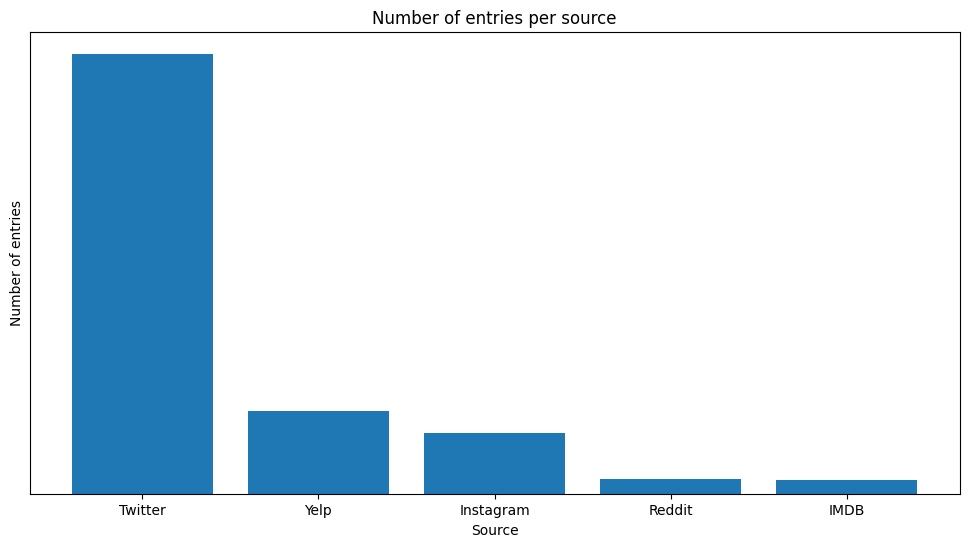

In [36]:
# Check souce distribution of dataset with graph
source_counts = preview_data['source'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(source_counts.index, source_counts.values)
plt.yticks([])
plt.xlabel('Source')
plt.ylabel('Number of entries')
plt.title('Number of entries per source')
plt.show()

In [37]:
import pandas as pd

# Sampling percentage for pretraining
pretrain_percentage = 0.70
threshold_difference = 1000

# Separate data by polarity
positive_data = preview_data[preview_data['polarity'] == 1]
negative_data = preview_data[preview_data['polarity'] == 0]

# Initialize lists to store results
pretraining_samples = []
finetuning_samples = []

# Process data for each source
for source in preview_data['source'].unique():
    # Filter data by source
    pos_source = positive_data[positive_data['source'] == source]
    neg_source = negative_data[negative_data['source'] == source]

    # Count polarity
    pos_count = len(pos_source)
    neg_count = len(neg_source)
    difference = abs(pos_count - neg_count)

    if difference < threshold_difference:
        # Case 1: If counts are equal, take 70% for pretraining
        pos_pretrain = pos_source.sample(frac=pretrain_percentage, random_state=RANDOM_SEED)
        neg_pretrain = neg_source.sample(frac=pretrain_percentage, random_state=RANDOM_SEED)
        
        # Remaining data goes to fine-tuning
        pos_finetune = pos_source.drop(pos_pretrain.index)
        neg_finetune = neg_source.drop(neg_pretrain.index)

    else:
        # Case 2: If counts are unequal, balance for fine-tuning and send excess to pretraining
        min_count = min(pos_count, neg_count)
        
        # Balanced data for fine-tuning
        pos_finetune = pos_source.sample(n=min_count, random_state=RANDOM_SEED)
        neg_finetune = neg_source.sample(n=min_count, random_state=RANDOM_SEED)

        # Excess samples for pretraining
        pos_pretrain = pos_source.drop(pos_finetune.index)
        neg_pretrain = neg_source.drop(neg_finetune.index)

    # Add to datasets
    pretraining_samples.append(pos_pretrain)
    pretraining_samples.append(neg_pretrain)
    finetuning_samples.append(pos_finetune)
    finetuning_samples.append(neg_finetune)

# Combine pretraining and fine-tuning datasets
pretraining_data = pd.concat(pretraining_samples)
finetuning_data = pd.concat(finetuning_samples)

# Shuffle datasets
pretraining_data = pretraining_data.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
finetuning_data = finetuning_data.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

In [38]:
# Save to files
output_file_pretraining = 'Datasets/Cleaned/pretraining_dataset.csv'
output_file_finetune = 'Datasets/Cleaned/finetuning_dataset.csv'
pretraining_data.to_csv(output_file_pretraining, index=False)
finetuning_data.to_csv(output_file_finetune, index=False)

# Print shapes for confirmation
print(f"Shape of pretraining data: {pretraining_data.shape}")
print(f"Shape of finetuning data: {finetuning_data.shape}")

Shape of pretraining data: (1498692, 3)
Shape of finetuning data: (722874, 3)


In [39]:
import pandas as pd

# Load the sampled and remaining datasets
pretraining_file = 'Datasets/Cleaned/pretraining_dataset.csv'  # Replace with actual file name
finetuning_file = 'Datasets/Cleaned/finetuning_dataset.csv'  # Replace with actual file name

pretraining_data = pd.read_csv(pretraining_file)
finetuning_data = pd.read_csv(finetuning_file)

# Function to calculate distribution
def calculate_distribution(df):
    distribution = df.groupby(['source', 'polarity']).size().unstack(fill_value=0)
    distribution['total'] = distribution.sum(axis=1)
    distribution['positive_percent'] = (distribution.get(1, 0) / distribution['total']) * 100
    distribution['negative_percent'] = (distribution.get(0, 0) / distribution['total']) * 100
    return distribution

# Calculate distributions for sampled and remaining datasets
print("Distribution in Pretraining Dataset:")
pretraining_distribution = calculate_distribution(pretraining_data)
print(pretraining_distribution)

print("\nDistribution in Finetuning Dataset:")
finetuning_distribution = calculate_distribution(finetuning_data)
print(finetuning_distribution)


Distribution in Pretraining Dataset:
polarity        0       1    total  positive_percent  negative_percent
source                                                                
IMDB        17500   17500    35000         50.000000         50.000000
Instagram       0  119524   119524        100.000000          0.000000
Reddit          0   16356    16356        100.000000          0.000000
Twitter    558908  558912  1117820         50.000179         49.999821
Yelp       104996  104996   209992         50.000000         50.000000

Distribution in Finetuning Dataset:
polarity        0       1   total  positive_percent  negative_percent
source                                                               
IMDB         7500    7500   15000         50.000000         50.000000
Instagram   50911   50911  101822         50.000000         50.000000
Reddit      18494   18494   36988         50.000000         50.000000
Twitter    239532  239534  479066         50.000209         49.999791
Yelp     